In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing data (Iris dataset from Sklearn) 

In [2]:
from sklearn import datasets

#-------------------------------------------------------------------
iris = datasets.load_iris()
input_ads_pre = pd.DataFrame(iris.data, columns=iris.feature_names)
input_ads_pre['Target'] = iris.get('target')

#-------------------------------------------------------------------
print(input_ads_pre.shape)
input_ads_pre.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Separating the target column out

In [3]:
ads_arr = np.array(input_ads_pre)[:,:-1]
ads_arr_y = np.array(input_ads_pre)[:,-1]

#-------------------------------------------
print(ads_arr.shape)
print(ads_arr_y.shape)

(150, 4)
(150,)


# Scaling the data with standard scaler 

In [4]:
from sklearn.preprocessing import StandardScaler

ads_arr_scaled = StandardScaler().fit_transform(ads_arr)
ads_arr_scaled[0]

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

# Sklearn implementation of PCA (for benchmarking)

In [5]:
from sklearn.decomposition import PCA

#-------------------------------------------------------
pca = PCA()
principalComponents = pca.fit_transform(ads_arr_scaled)
principalComponents.shape

(150, 4)

# PCA from scratch

In [6]:
from numpy.linalg import eig

#Mean Centering
ads_arr_centred = ads_arr_scaled - np.mean(ads_arr_scaled,axis=0)

#Covariance calculation
cov_matrix = np.cov(ads_arr_centred.T)
print('Shape of Covariance matrix (Should be no of features) :',cov_matrix.shape)

#Eigen Value Decomposition To find the loading vectors
eigvalues, eigvectors = eig(cov_matrix)
 
#Sorting by eigen values
idx = np.argsort(eigvalues)[::-1]
print(idx)
eigvectors = eigvectors[:,idx]
eigvalues = eigvalues[idx]

#Calculating dot product with high dimensional data to calculate projections
projections = np.dot(ads_arr_centred,eigvectors)
projections.shape

Shape of Covariance matrix (Should be no of features) : (4, 4)
[0 1 2 3]


(150, 4)

# Comparison of manual implementation vs Sklearn implementation (Should be same)

In [7]:
div = (eigvalues/(len(ads_arr_centred)-1))
explained_ratio = div/sum(div)

#----------------------------------------------------------------------------------------------------------------------------
print('Sklearn vs Manual for Loading vector \n (Absolute values taken since the sign of eigen vectors have no relevance)')
print(abs(pca.components_).round(10)==abs(eigvectors.T).round(10),'\n')

print('Sklearn vs Manual for Principal Component Values (unique elements) \n (Absolute values taken since the sign of eigen vectors have no relevance)')
print(np.unique(abs(principalComponents).round(10)==abs(projections).round(10)),'\n')

print('Sklearn vs Manual for Explained Variance')
print(pca.explained_variance_.round(10)==eigvalues.round(10),'\n')

print('Sklearn vs Manual for Explained Variance Ratio')
print(pca.explained_variance_ratio_.round(10)==explained_ratio.round(10),'\n')

Sklearn vs Manual for Loading vector 
 (Absolute values taken since the sign of eigen vectors have no relevance)
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]] 

Sklearn vs Manual for Principal Component Values (unique elements) 
 (Absolute values taken since the sign of eigen vectors have no relevance)
[ True] 

Sklearn vs Manual for Explained Variance
[ True  True  True  True] 

Sklearn vs Manual for Explained Variance Ratio
[ True  True  True  True] 



## Insight - Since everything is true, our manual PCA code is exactly same to the sklearn implementation

## Plotting manual PCA results

<AxesSubplot:>

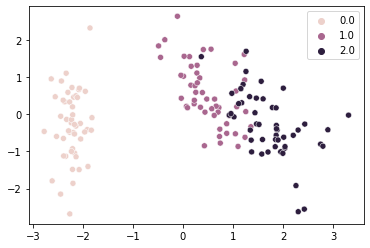

In [8]:
import seaborn as sns

sns.scatterplot(x=projections[:,0],y=projections[:,1],hue=ads_arr_y)

## Plotting sklearn PCA results

<AxesSubplot:>

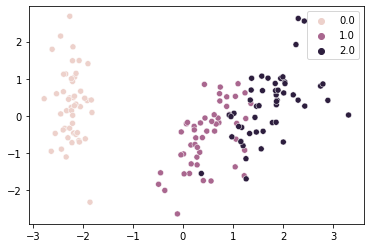

In [9]:
import seaborn as sns

sns.scatterplot(x=principalComponents[:,0],y=principalComponents[:,1],hue=ads_arr_y)

## Explained variance ratio (sums up to 1)

In [10]:
explained_ratio

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

### Insight - From the explained ratio we can see that principal component-0 explains ~73% of the data, while PC-1 explains ~23%. When combined, they explain 96% of the whole data and hence with minimal loss of data, we get two axis to visualize our data properly in the 2-d space

# END